**50 startups**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

from statsmodels.graphics.regressionplots import influence_plot

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv("/content/50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Feature engineering

In [3]:
df = df.rename({'R&D Spend': 'RDS', 'Marketing Spend': 'MS', 'Administration' : 'ADMS'}, axis= 1)
df.head(2)

,RDS,ADMS,MS,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


EDA

In [4]:
df.describe()

,RDS,ADMS,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
df.isna().sum()

RDS       0
ADMS      0
MS        0
State     0
Profit    0
dtype: int64

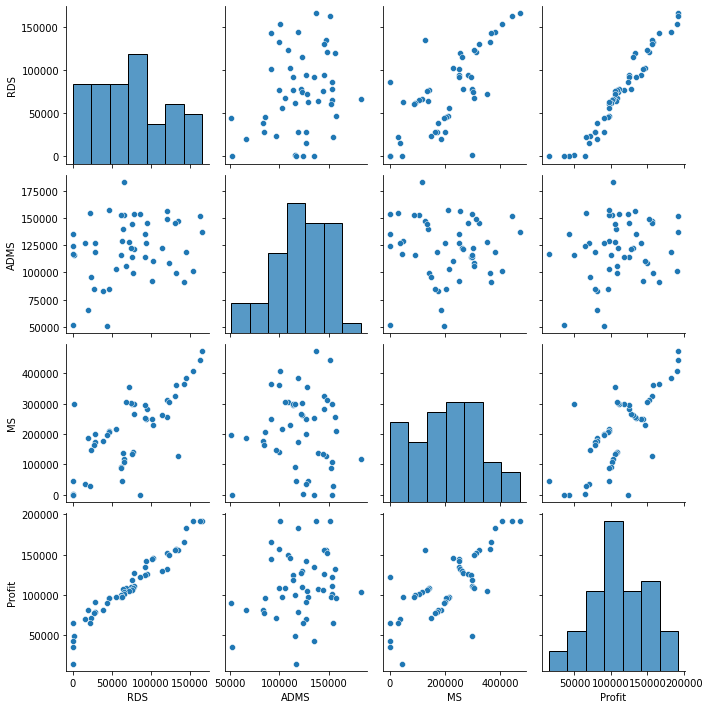

In [6]:
sns.pairplot(df)

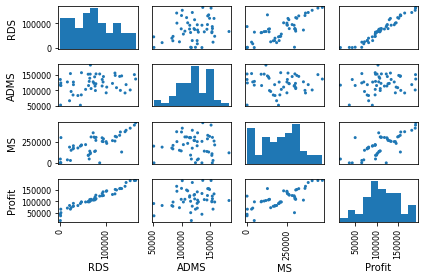

In [7]:
pd.plotting.scatter_matrix(df, alpha=1)
plt.tight_layout()

Correlation analysis

In [8]:
df.corr()

,RDS,ADMS,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMS,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


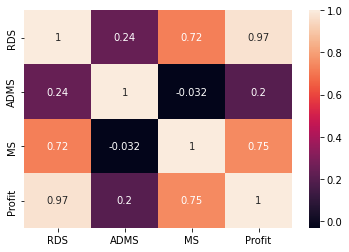

In [9]:
sns.heatmap(df.corr(), annot= True)

Model Building

In [10]:
model = smf.ols('Profit~ RDS+ ADMS+ MS', data=df).fit()

Model Testing

In [11]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MS               0.027228
dtype: float64

In [12]:
# Finding tvalues and pvalues
model.tvalues, model.pvalues

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MS            1.655077
 dtype: float64, Intercept    1.057379e-09
 RDS          2.634968e-22
 ADMS         6.017551e-01
 MS           1.047168e-01
 dtype: float64)

In [13]:
# Finding rsquared values
model.rsquared, model.rsquared_adj

(0.9507459940683246, 0.9475337762901719)

Model accuracy is 94%

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        06:54:02   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDS            0.8057      0.045     17.846      0.000       0.715       0.897
ADMS          -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

In [15]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MS'
# Also find their tvalues and pvalues

In [16]:
ADMS_model = smf.ols('Profit~ADMS', data=df).fit()

In [17]:
ADMS_model.params

Intercept    76974.471305
ADMS             0.288749
dtype: float64

In [18]:
ADMS_model.tvalues, ADMS_model.pvalues

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64, Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

ADMS has in-significant pvalue

In [19]:
MS_model = smf.ols('Profit~MS',data=df).fit()
MS_model.tvalues, MS_model.pvalues

(Intercept    7.808356
 MS           7.802657
 dtype: float64, Intercept    4.294735e-10
 MS           4.381073e-10
 dtype: float64)

In [20]:
ADMS_MS_model = smf.ols('Profit~ ADMS+ MS', data=df).fit()
ADMS_MS_model.tvalues, ADMS_MS_model.pvalues

(Intercept    1.142741
 ADMS         2.467779
 MS           8.281039
 dtype: float64, Intercept    2.589341e-01
 ADMS         1.729198e-02
 MS           9.727245e-11
 dtype: float64)

varaibles have significant pvalues

**Model Validation**

In [21]:
#Calculate VIF = 1/(1-Rsquare) for all independent variables
model_RDS= smf.ols('RDS~ ADMS+ MS',data=df).fit().rsquared
RDS_vif = 1/(1-model_RDS)

model_ADMS= smf.ols('ADMS~ RDS+ MS', data=df).fit().rsquared
ADMS_vif = 1/(1-model_ADMS)

model_MS = smf.ols('MS~ ADMS+ RDS',data=df).fit().rsquared
MS_vif = 1/(1-model_MS)

VIF = pd.DataFrame({
    'Feature' : ['RDS', 'ADMS', "MS"],
    'VIF' : [RDS_vif, ADMS_vif, MS_vif]
})

VIF

,Feature,VIF
0,RDS,2.468903
1,ADMS,1.175091
2,MS,2.326773


None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation

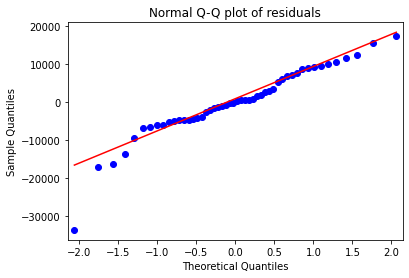

In [22]:
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
np.where(model.resid < -30000)

(array([49]),)

**creating regression plots**

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        06:54:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

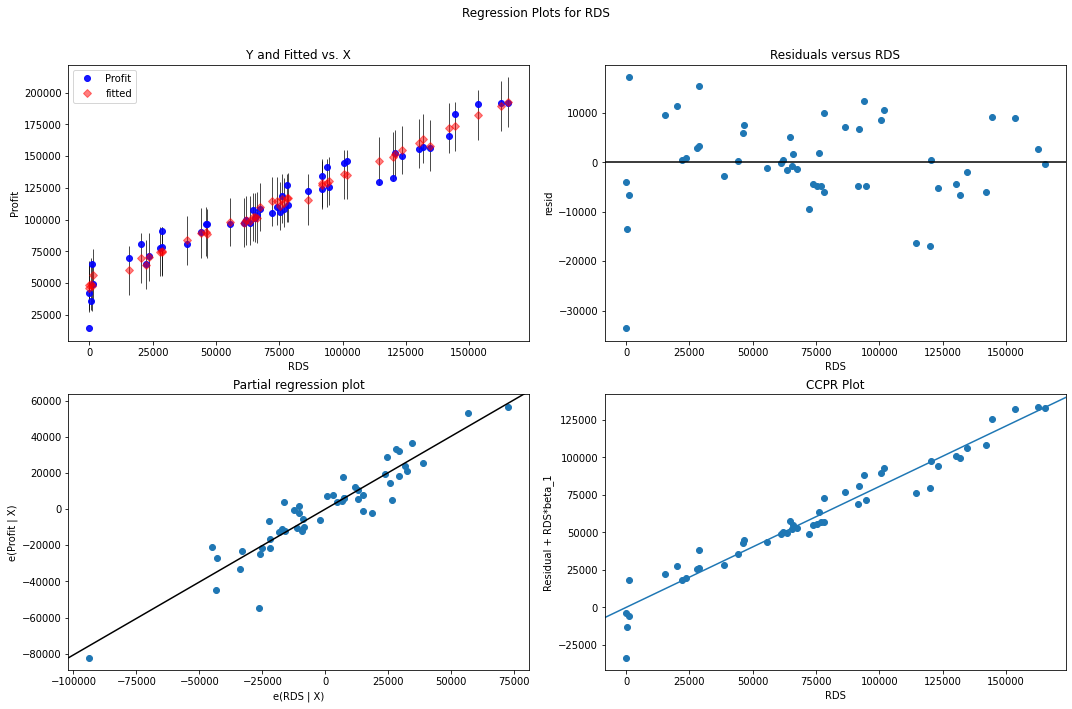

In [24]:
# display model summary
print(model.summary())
  
# modify figure size
fig = plt.figure(figsize=(15, 10))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'RDS', fig=fig)

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
eval_env: 1

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        06:54:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

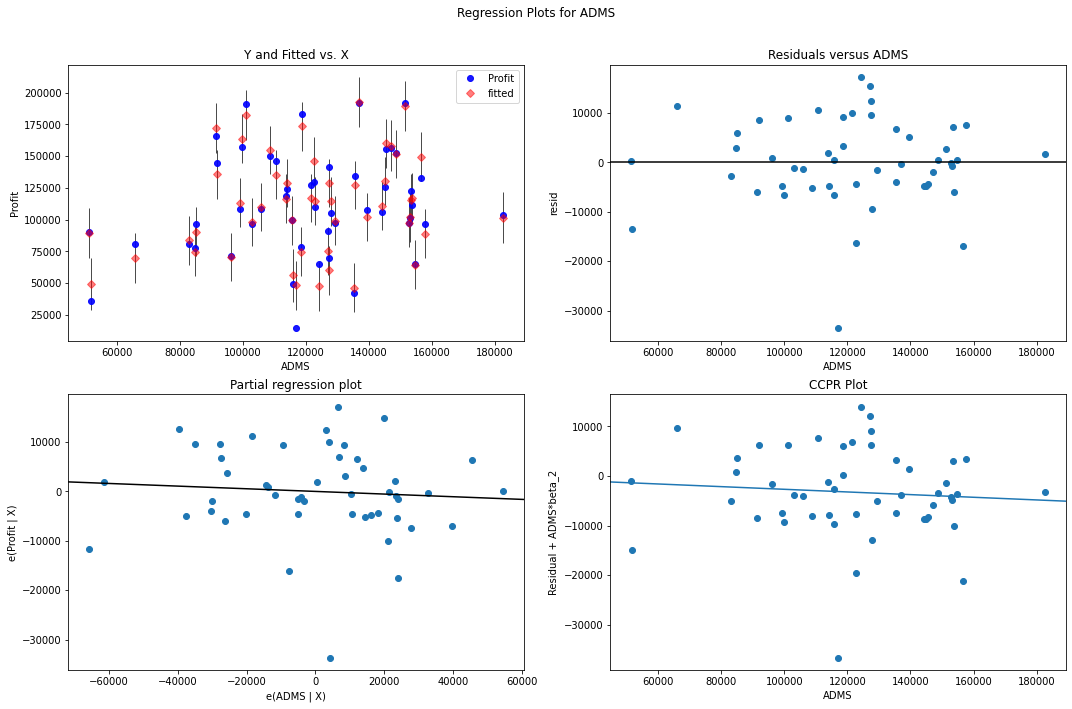

In [25]:
print(model.summary())
fig = plt.figure(figsize=(15, 10))
fig = sm.graphics.plot_regress_exog(model, 'ADMS', fig=fig)

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
eval_env: 1

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           4.53e-30
Time:                        06:54:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

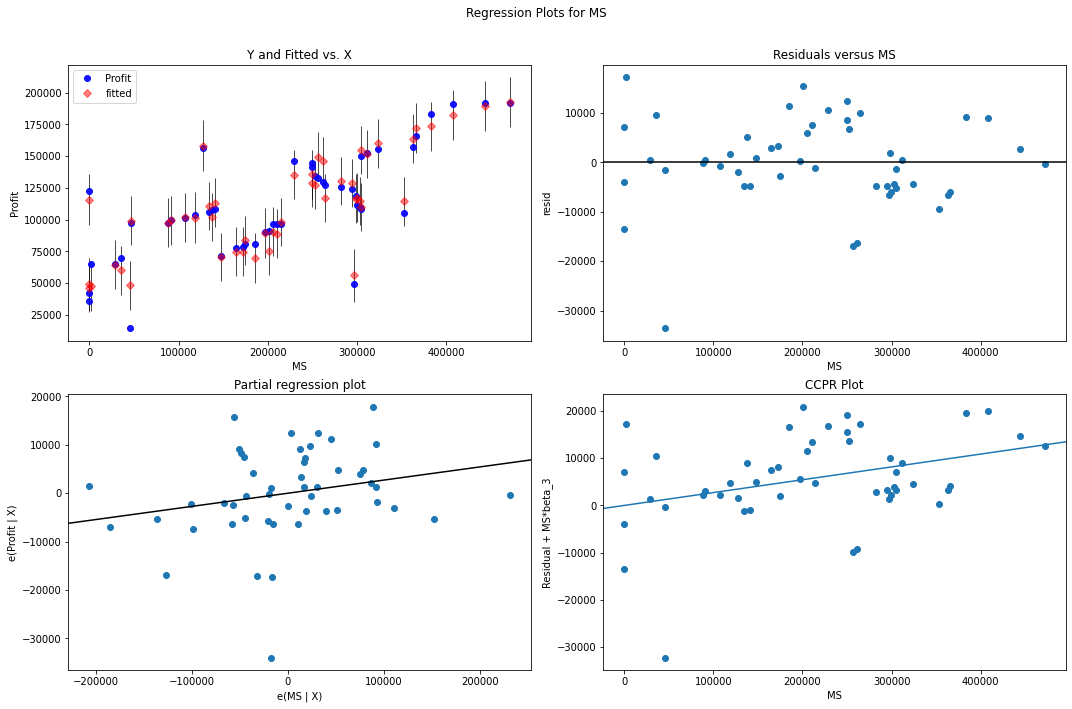

In [26]:
print(model.summary())
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'MS', fig = fig)

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
eval_env: 1

In [27]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(values) : return (values-values.mean())/values.std()  # User defined z = (x - mu)/sigma

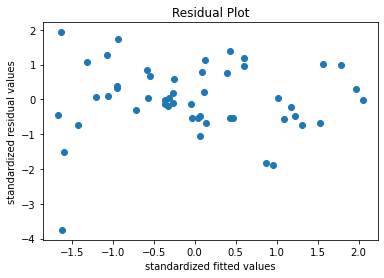

In [28]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

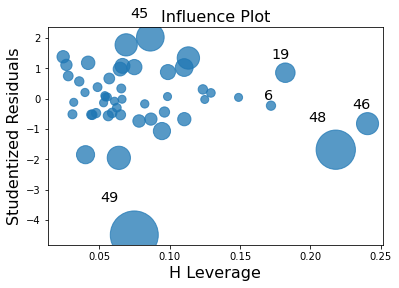

In [29]:
sm.graphics.influence_plot(model)
plt.show()

**Detecting Influencers / Outliers**

In [30]:
(c, _) = model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Text(0, 0.5, 'Cooks Distance')

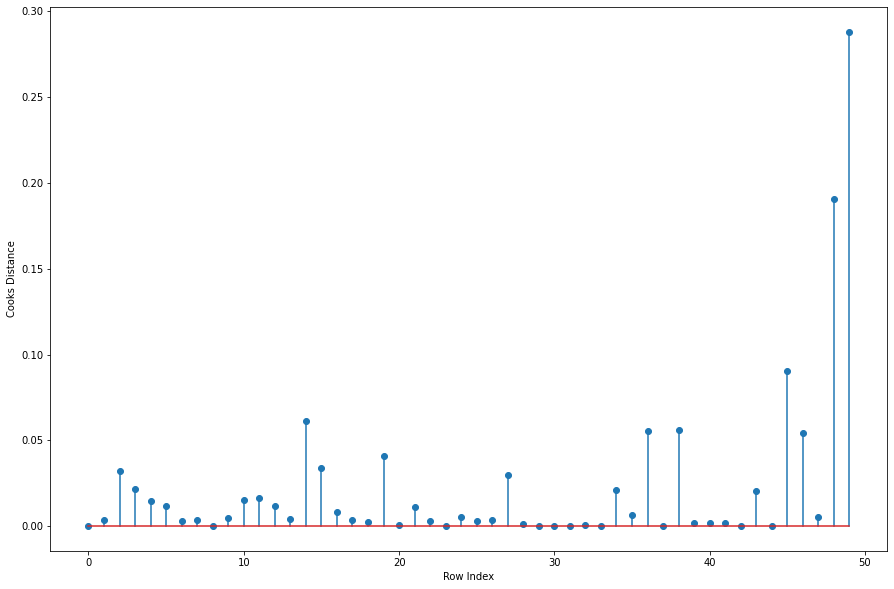

In [31]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize=(15, 10))
plt.stem(np.arange(len(df)), np.round(c, 5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [32]:
# Index and value of influencer
np.argmax(c) , np.max(c)

(49, 0.2880822927543272)

**Improving the model**

In [33]:
df.drop(49, axis=0, inplace=True)

In [34]:
len(df)

49

In [35]:
final_model= smf.ols('Profit~RDS+ ADMS+ MS',data=df).fit()

In [36]:
final_model.tvalues, final_model.pvalues

(Intercept     9.450782
 RDS          20.469501
 ADMS         -0.517889
 MS            1.825383
 dtype: float64, Intercept    2.960000e-12
 RDS          1.971077e-24
 ADMS         6.070728e-01
 MS           7.458443e-02
 dtype: float64)

In [37]:
final_model.rsquared,final_model.rsquared_adj

(0.9613162435129848, 0.9587373264138505)

Model accuracy is 95.87%

**Model Prediction**

In [38]:
df.head(3)

,RDS,ADMS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [39]:
new_data = (pd.DataFrame({
    "RDS": [168753.31, 173973.13, 175331.313],
    "ADMS": [133424.42, 176527.42, 134241.42],
    "MS": [424213.22, 423562.35,5342444.53]
}))
new_data

,RDS,ADMS,MS
0,168753.310,133424.42,424213.22
1,173973.130,176527.42,423562.35
2,175331.313,134241.42,5342444.53


In [40]:
model.predict(new_data)

0    194061.874594
1    197093.991509
2    333253.882777
dtype: float64

In [41]:
df = pd.read_csv("/content/ToyotaCorolla.csv", encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [42]:
df.columns

Index(['Id', 'Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Tow_Bar'],
      dtype='object')

**Feature Selection**

In [43]:
df = df.loc[:, (("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"))]

In [44]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


**Feature Engineering**

In [45]:
df = df.rename({'Age_08_04': 'Age', 'Quarterly_Tax': 'QT'}, axis= 1)
df.head(2)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165


**EDA**

In [46]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   Age     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   cc      1436 non-null   int64
 5   Doors   1436 non-null   int64
 6   Gears   1436 non-null   int64
 7   QT      1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [48]:
df.isna().sum()

Price     0
Age       0
KM        0
HP        0
cc        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

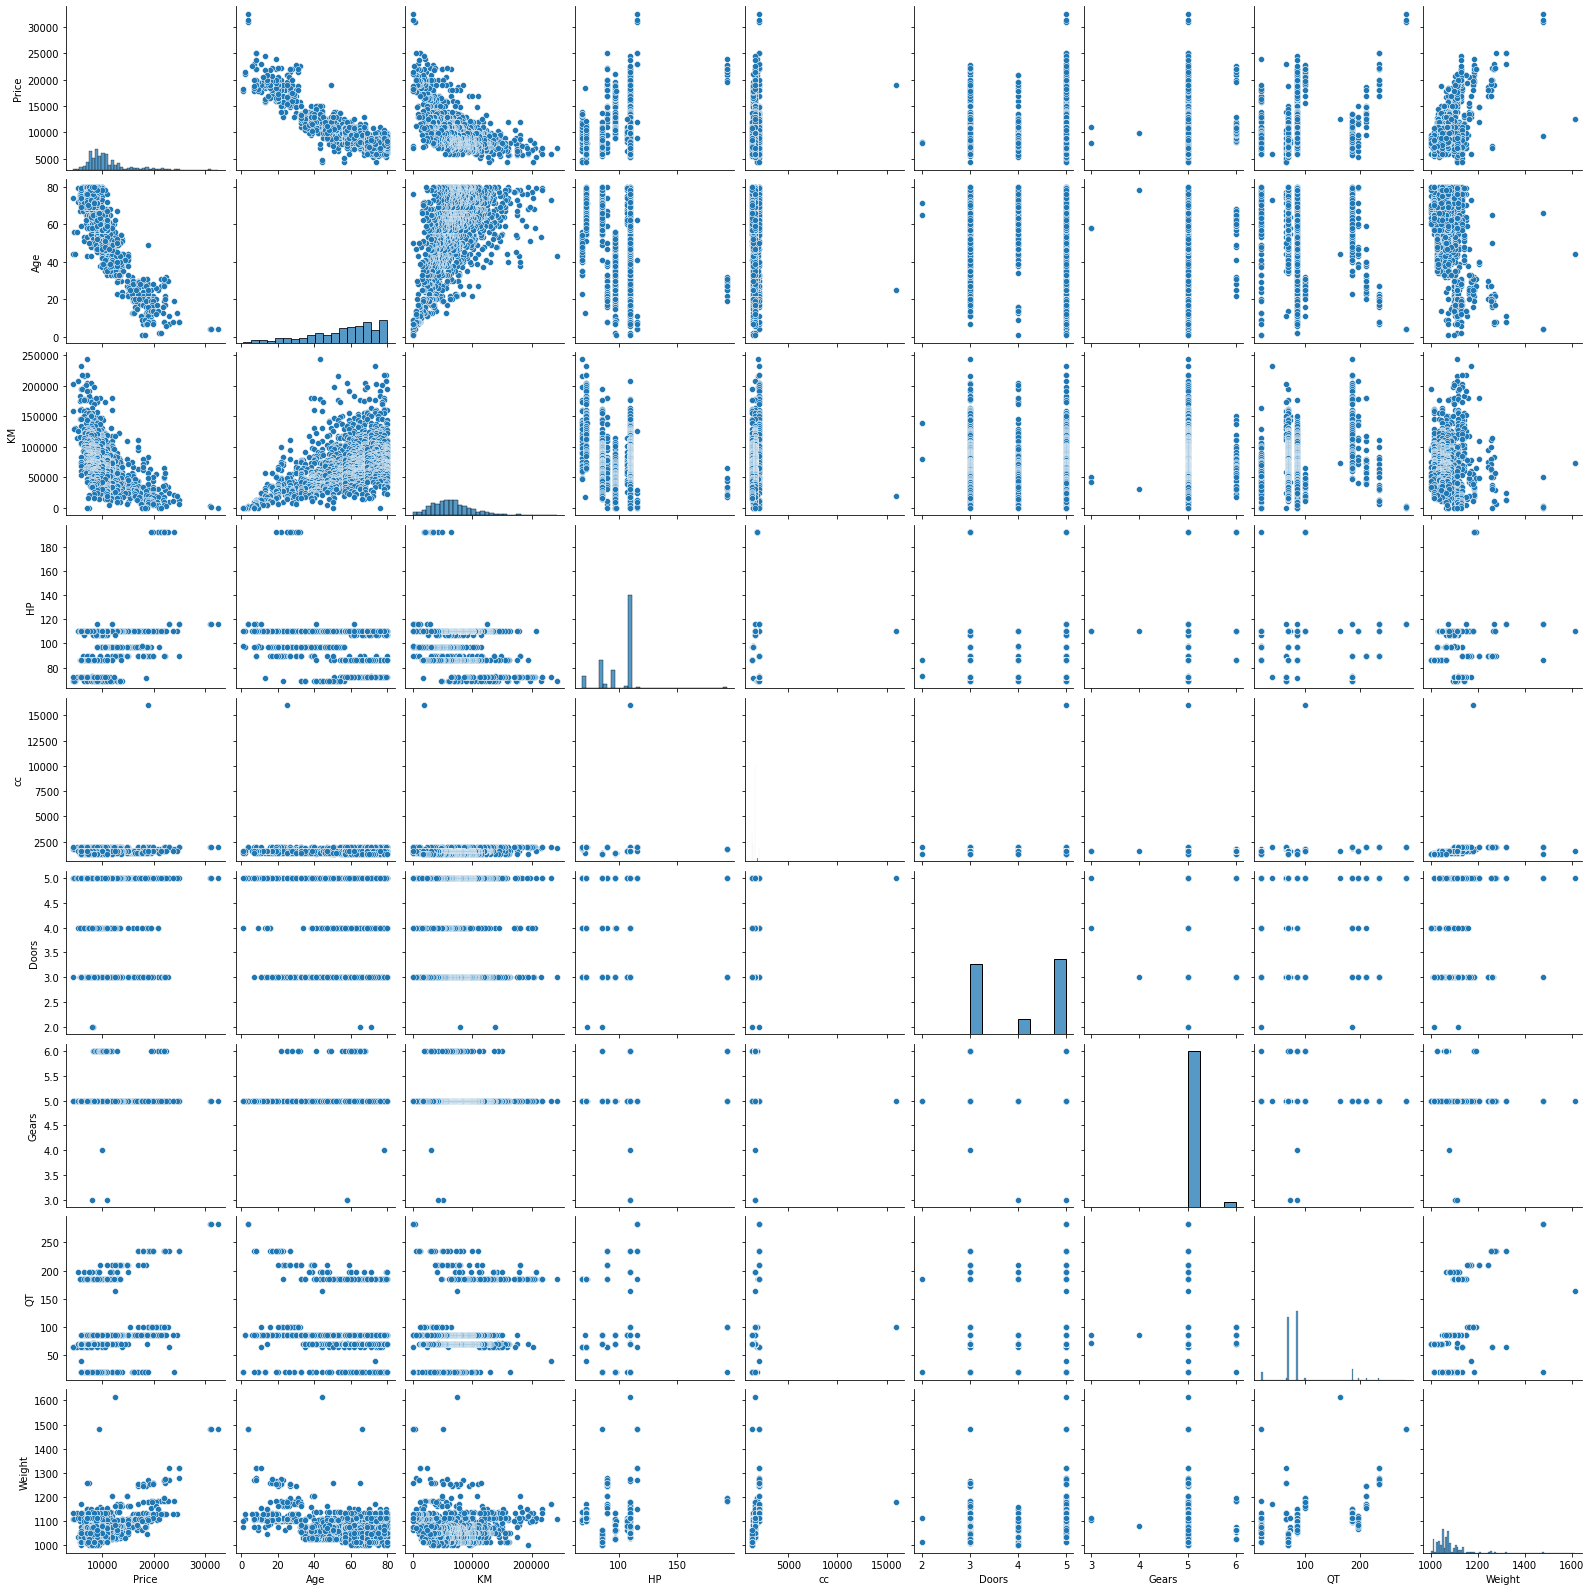

In [49]:
sns.pairplot(df)

In [50]:
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['figure.dpi'] = 100

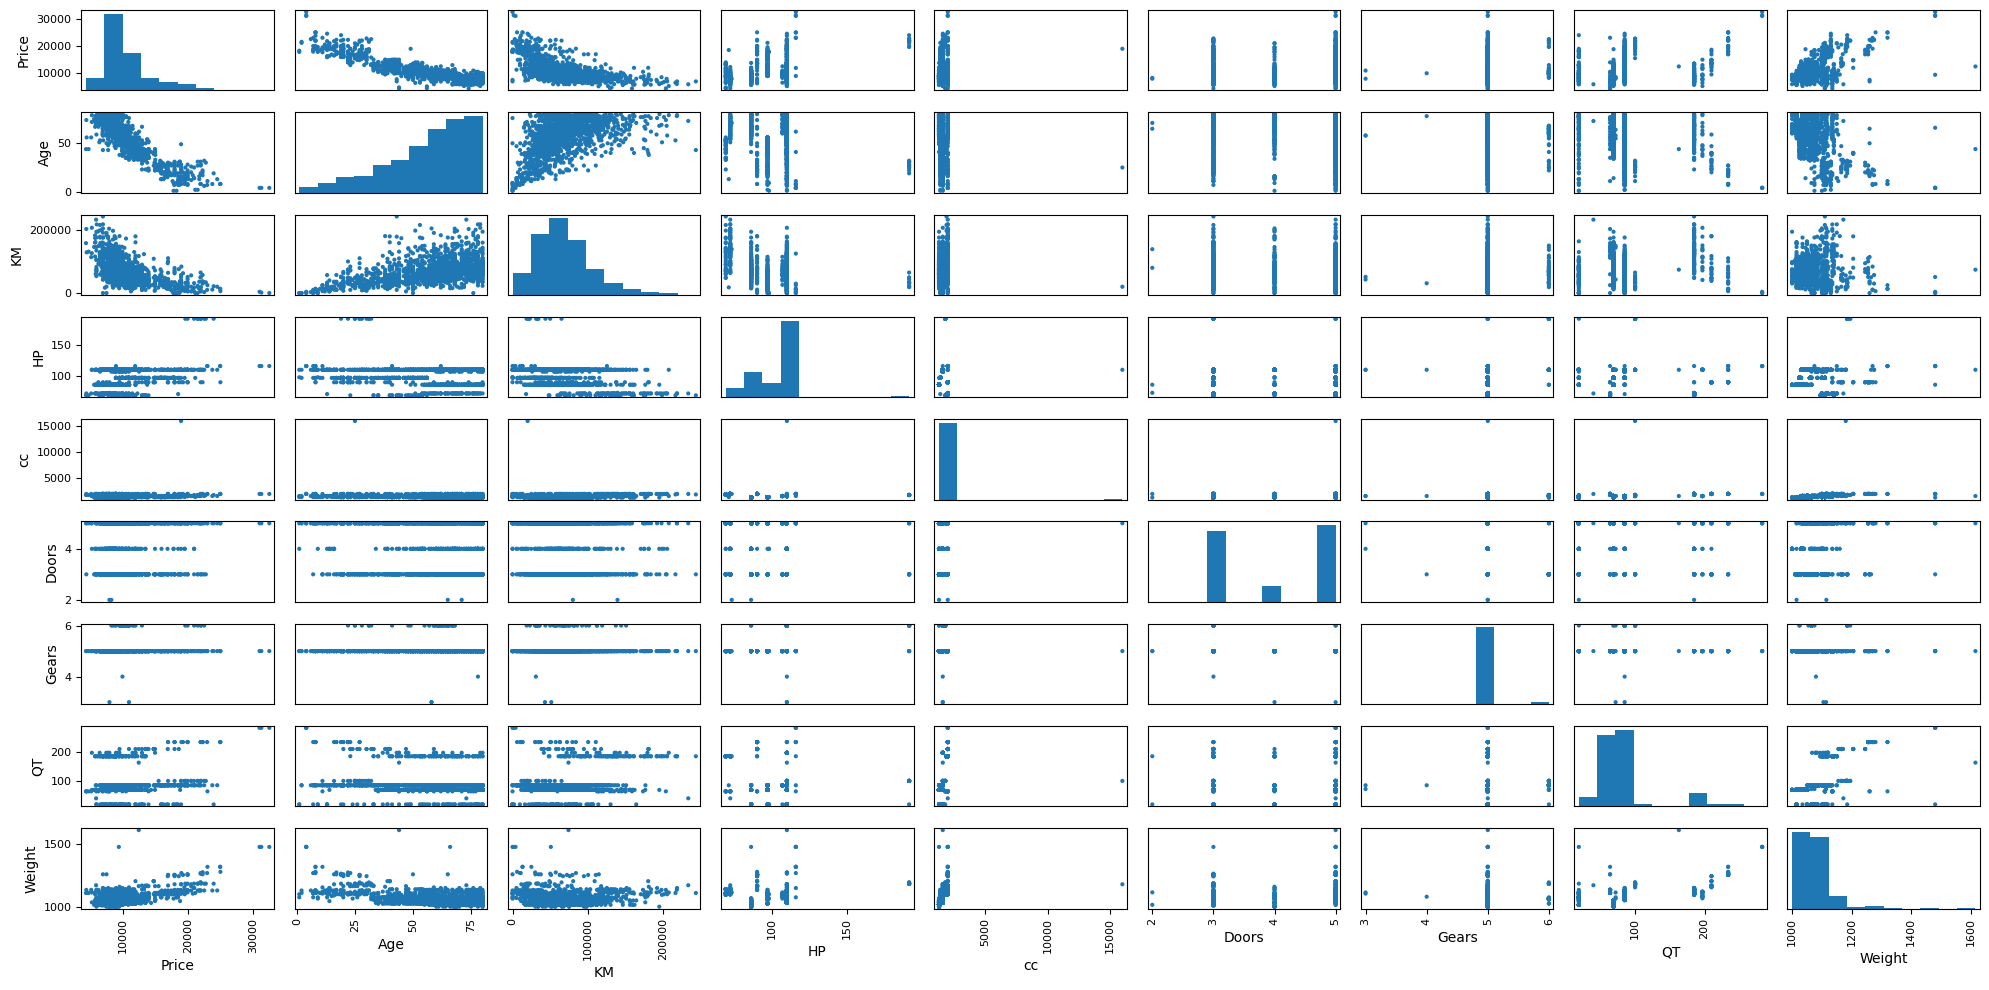

In [51]:
pd.plotting.scatter_matrix(df, alpha=1)
plt.tight_layout()

**Correlation Analysis**

In [52]:
df.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


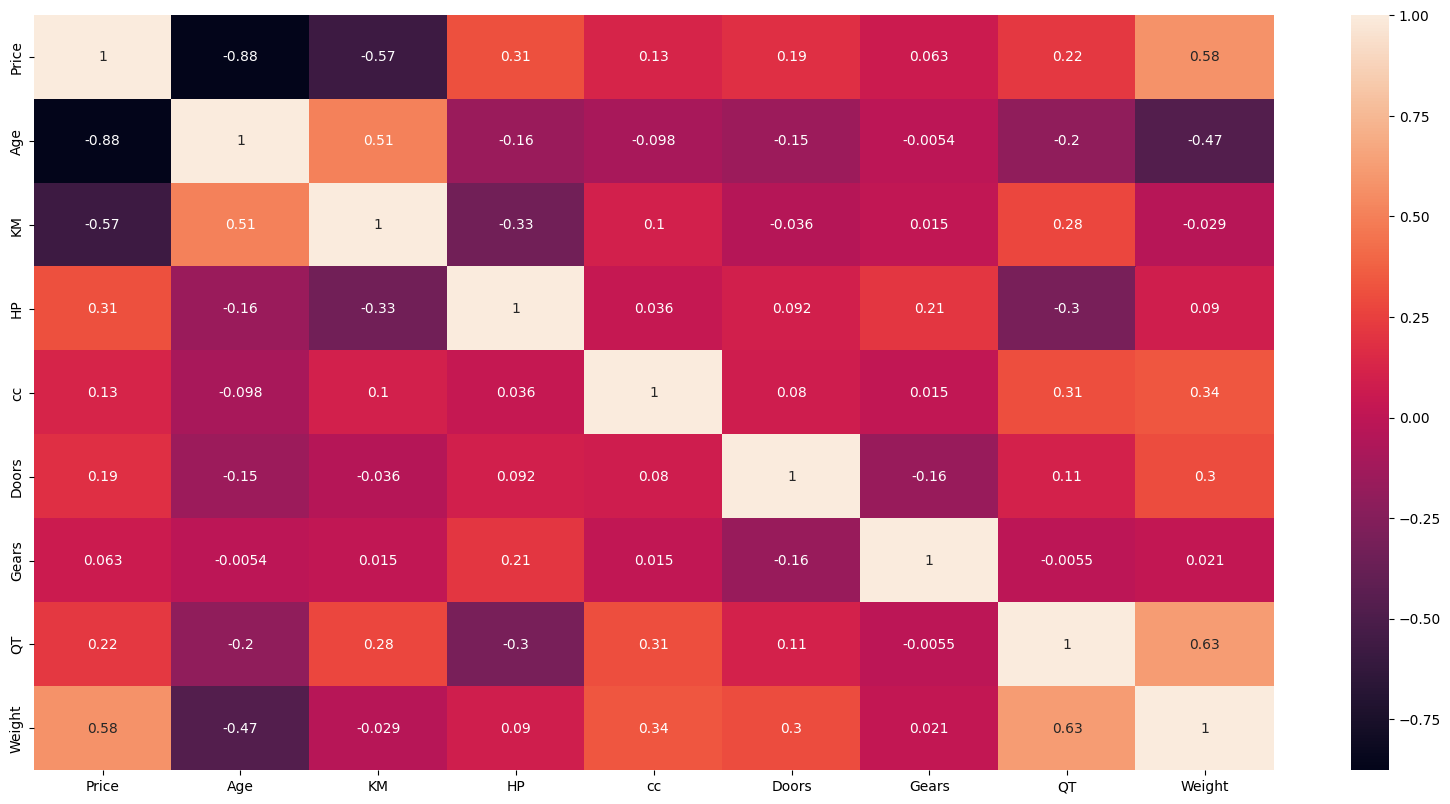

In [53]:
sns.heatmap(df.corr(), annot=True)

**Model Building**

In [54]:
model = smf.ols('Price~ Age+ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=df).fit()

**Model Testing**

In [55]:
model.params

Intercept   -5573.106358
Age          -121.658402
KM             -0.020817
HP             31.680906
cc             -0.121100
Doors          -1.616641
Gears         594.319936
QT              3.949081
Weight         16.958632
dtype: float64

In [56]:
model.tvalues, model.pvalues

(Intercept    -3.948666
 Age         -46.511852
 KM          -16.621622
 HP           11.241018
 cc           -1.344222
 Doors        -0.040410
 Gears         3.016007
 QT            3.014535
 Weight       15.879803
 dtype: float64, Intercept     8.241949e-05
 Age          3.354724e-288
 KM            7.538439e-57
 HP            3.757218e-28
 cc            1.790902e-01
 Doors         9.677716e-01
 Gears         2.606549e-03
 QT            2.619148e-03
 Weight        2.048576e-52
 dtype: float64)

In [57]:
model.rsquared, model.rsquared_adj

(0.8637627463428191, 0.8629989775766962)

Model accuracy is 86.30%

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:54:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age         -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM            -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP            31.6809      2.818     11.241      0.000      26.152      37.209
cc            -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors         -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears        594.3199    197.055      3.016      0.003     207.771     980.869
QT             3.9491      1.310      3.015      0.003       1.379       6.519
Weight        16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.

In [59]:
# Build SLR and MLR models for insignificant variables 'cc' and 'Doors'
# Also find their tvalues and pvalues

In [60]:
cc_SLR = smf.ols('Price~cc',data=df).fit()
cc_SLR.tvalues, cc_SLR.pvalues

(Intercept    24.694090
 cc            4.824822
 dtype: float64, Intercept    1.766912e-112
 cc            1.550808e-06
 dtype: float64)

In [61]:
Doors_SLR = smf.ols('Price~Doors',data=df).fit()
Doors_SLR.tvalues, Doors_SLR.pvalues

(Intercept    19.258097
 Doors         7.141657
 dtype: float64, Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [62]:
cc_Doors_MLR=smf.ols('Price~cc+ Doors',data=df).fit()
cc_Doors_MLR.tvalues, cc_Doors_MLR.pvalues

(Intercept    12.620704
 cc            4.340400
 Doors         6.816153
 dtype: float64, Intercept    1.056885e-34
 cc           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

Calculate VIF

In [63]:
r_Age = smf.ols('Age~ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight', data=df).fit().rsquared
vif_Age = 1 / (1 - r_Age)

r_KM = smf.ols('KM~ Age+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=df).fit().rsquared
vif_KM = 1/(1-r_KM)

r_HP = smf.ols('HP~ Age+ KM+ cc+ Doors+ Gears+ QT+ Weight',data=df).fit().rsquared
vif_HP = 1/(1-r_HP)

r_cc = smf.ols('cc~ Age+ KM+ HP+ Doors+ Gears+ QT+ Weight',data=df).fit().rsquared
vif_cc = 1/(1-r_cc)

r_Doors = smf.ols('Doors~ Age+ KM+ cc+ HP+ Gears+ QT+ Weight',data=df).fit().rsquared
vif_Doors = 1/(1-r_Doors)

r_Gears = smf.ols('Gears~ Age+ KM+ cc+ Doors+ HP+ QT+ Weight',data=df).fit().rsquared
vif_Gears= 1/(1-r_Gears)

r_QT = smf.ols('QT~ Age+ KM+ cc+ Doors+ Gears+ HP+ Weight',data=df).fit().rsquared
vif_QT = 1/(1-r_QT)

r_Weight = smf.ols('Weight~ Age+ KM+ cc+ Doors+ Gears+ QT+ HP',data=df).fit().rsquared
vif_Weight = 1/(1-r_Weight)

In [64]:
VIF = pd.DataFrame({
    "Feature":['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'],
    'VIF': [vif_Age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_QT,vif_Weight]
})
VIF

,Feature,VIF
0,Age,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,QT,2.311431
7,Weight,2.516420


In [65]:
df.columns

Index(['Price', 'Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight'], dtype='object')

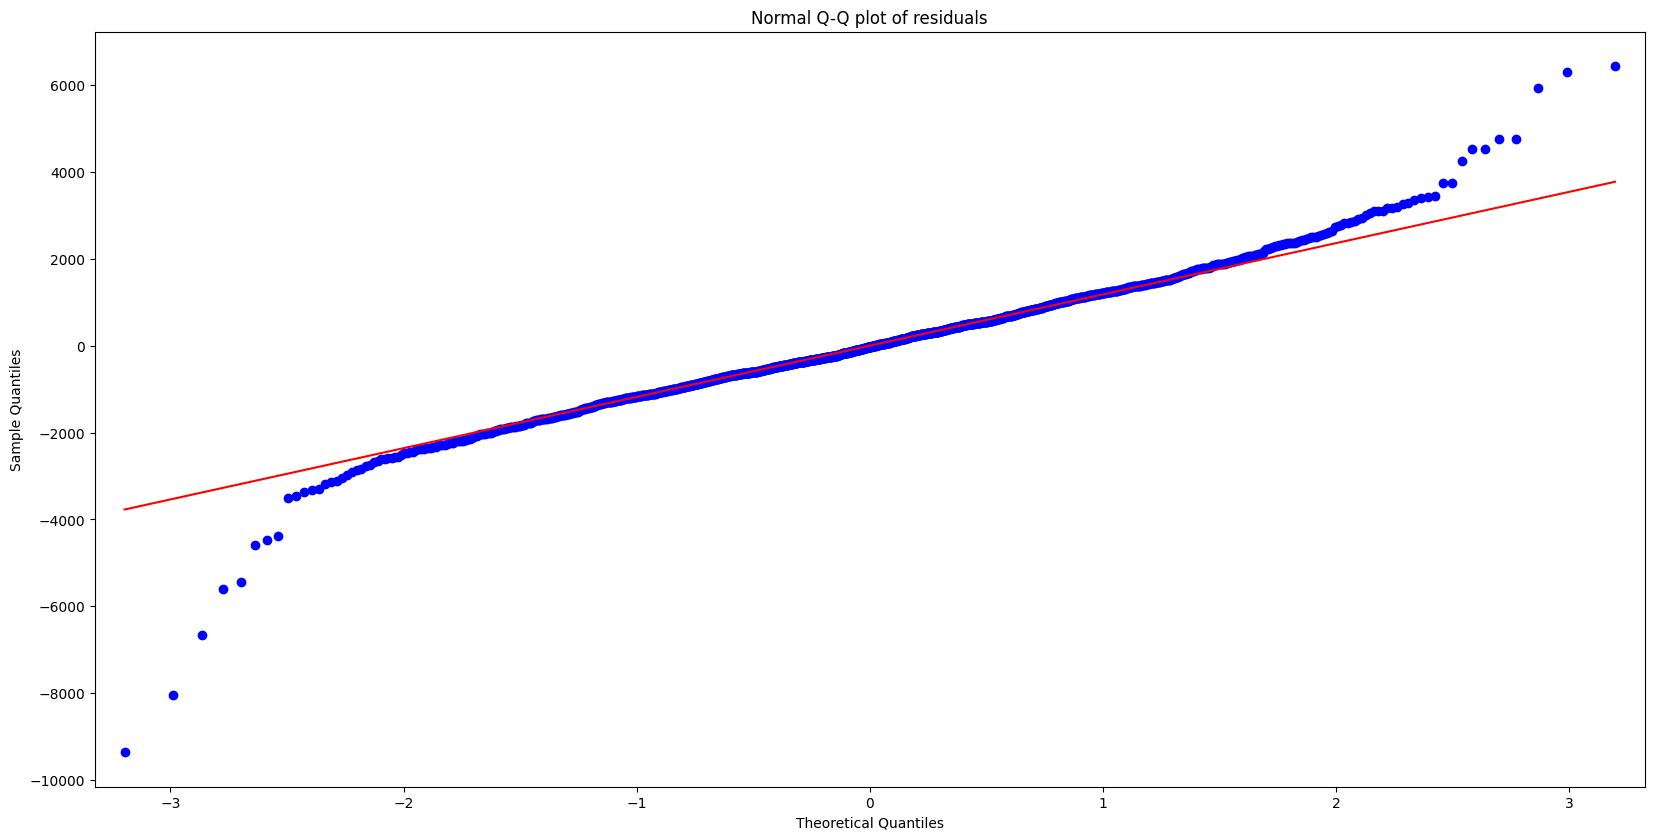

In [66]:
sm.qqplot(model.resid, line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [67]:
np.where(model.resid > 6000)

(array([147, 523]),)

In [68]:
np.where(model.resid < -6000)

(array([221, 601, 960]),)

**creating regression plots**

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        06:54:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5573.1064   1411.390     -3.949      0.0

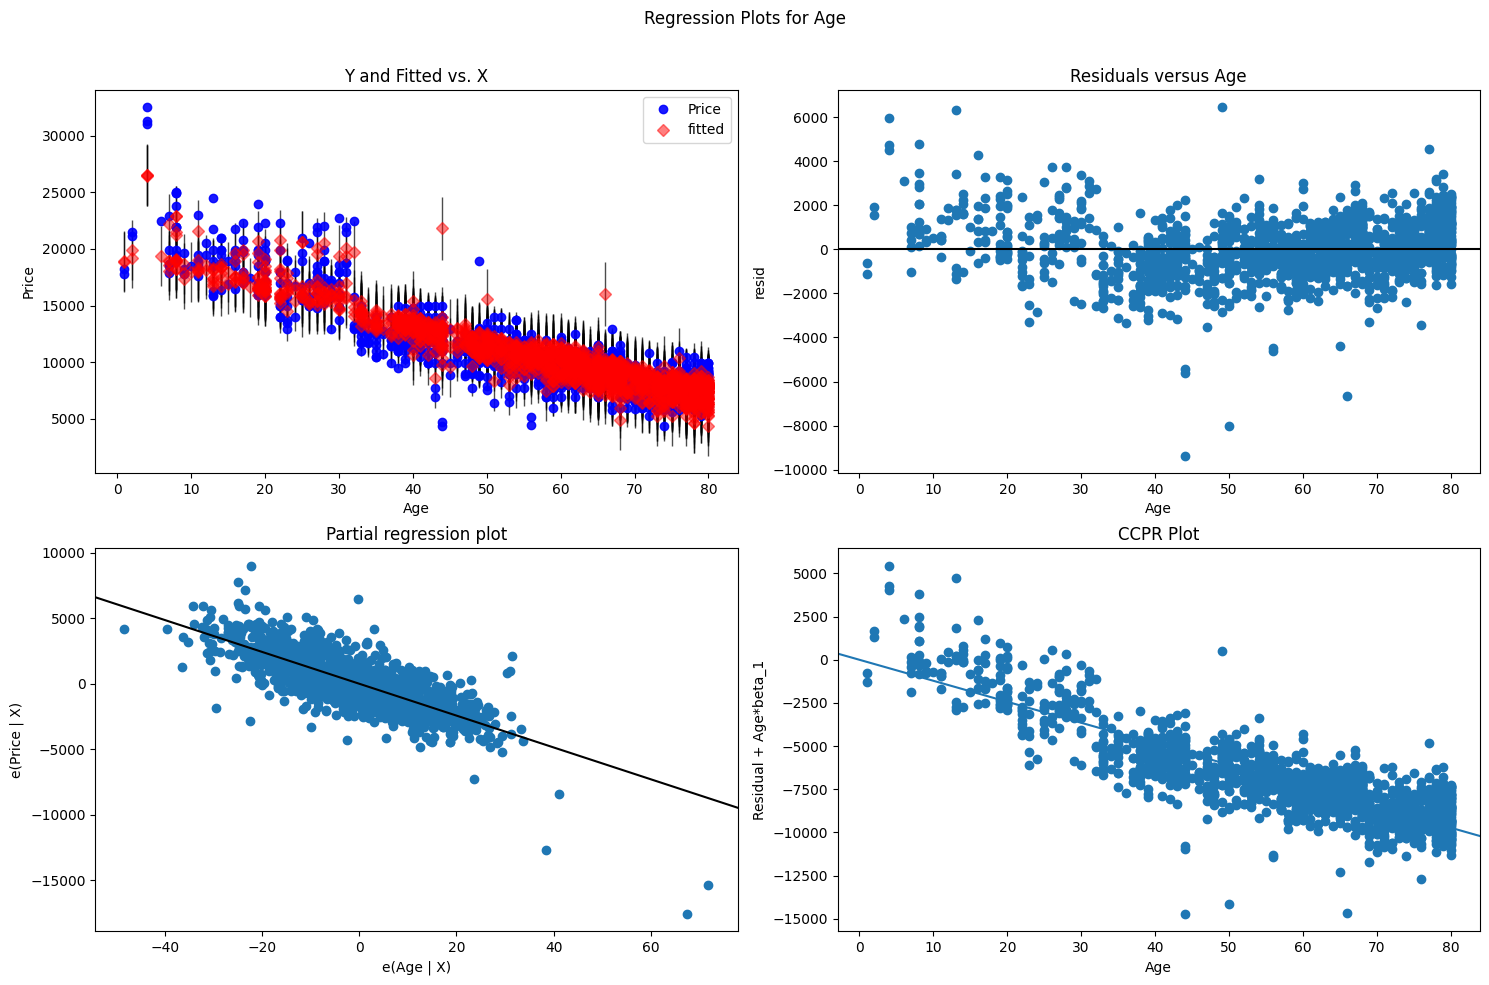

In [69]:
# display model summary
print(model.summary())
  
# modify figure size
fig = plt.figure(figsize=(15, 10))
  
# creating regression plots
fig = sm.graphics.plot_regress_exog(model, 'Age', fig=fig)

Notes:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
eval_env: 1

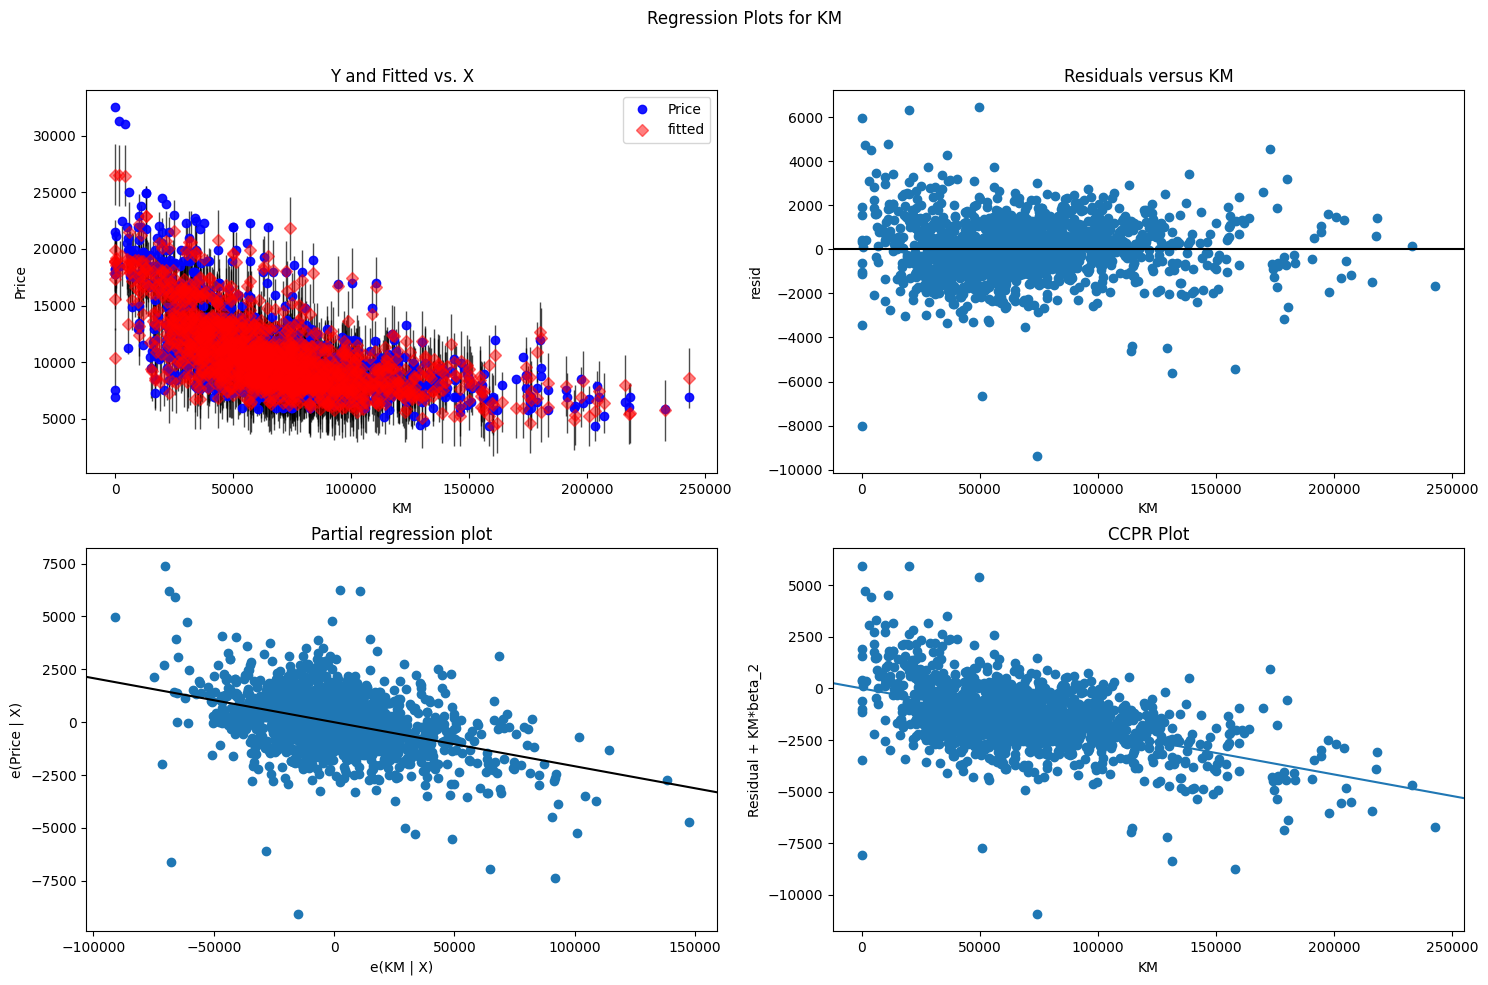

In [70]:
fig = plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model,'KM',fig=fig)

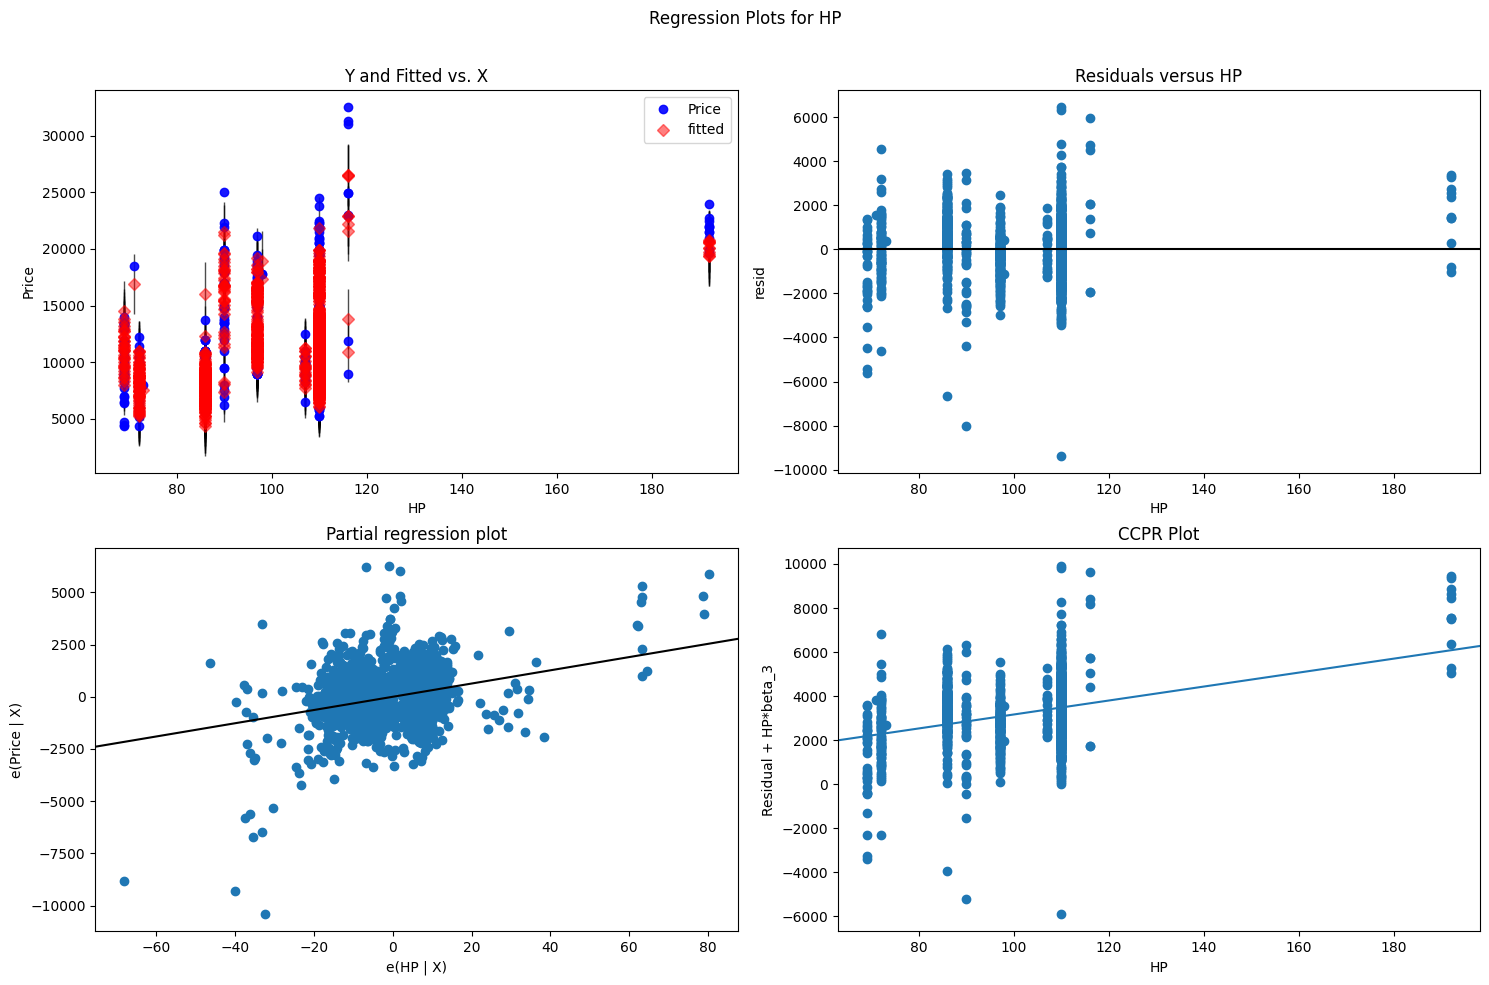

In [71]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model,'HP', fig=fig)

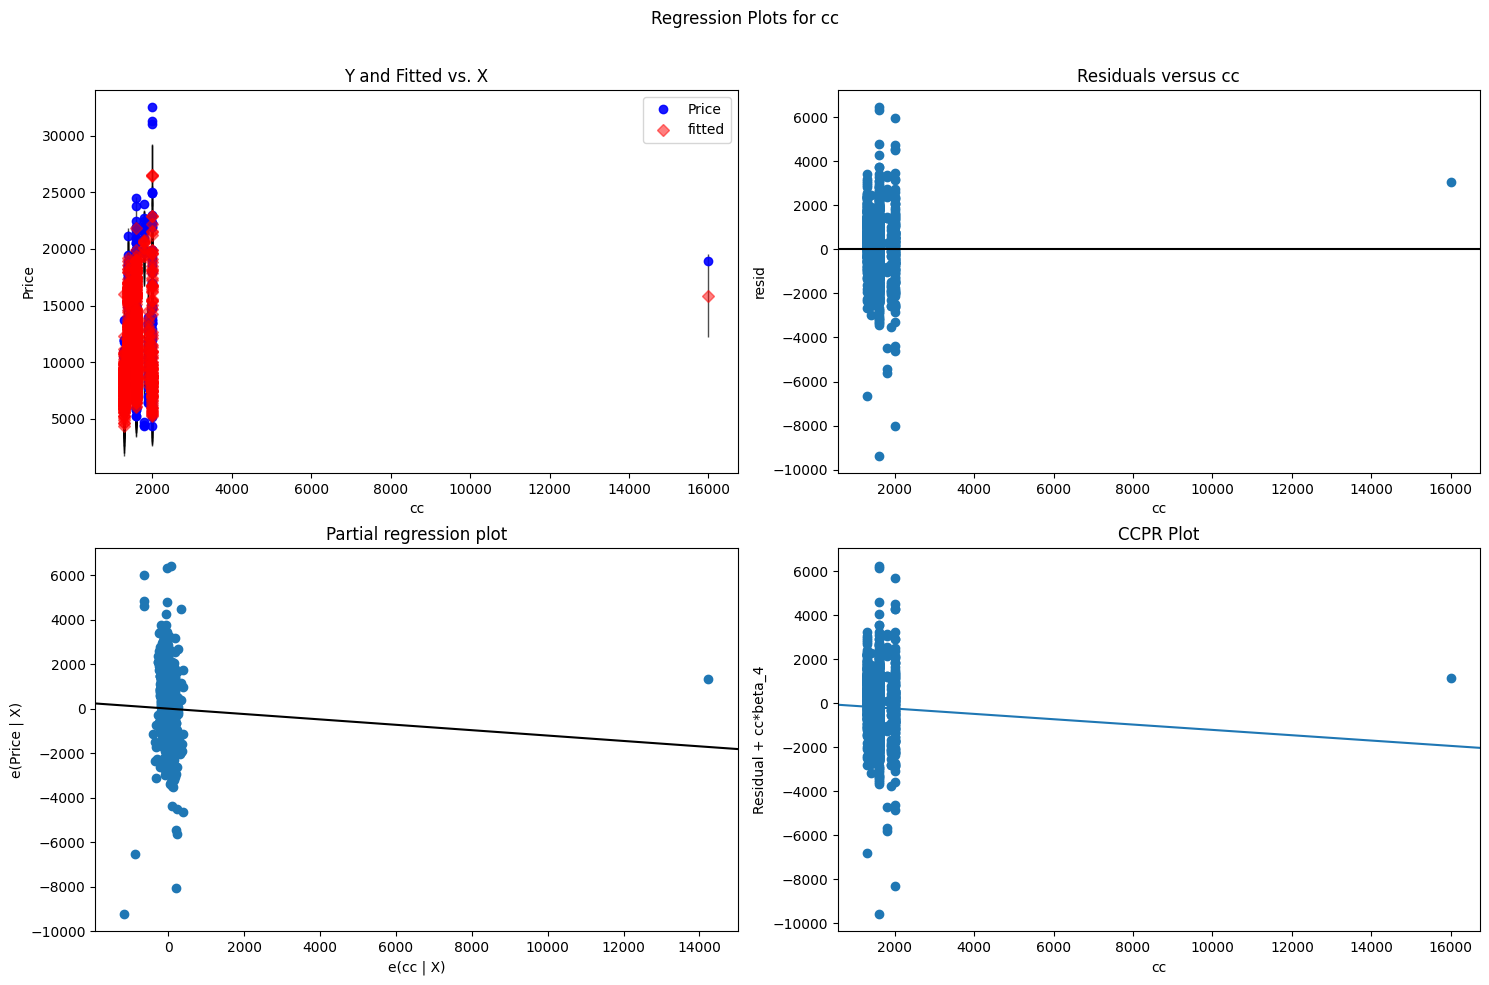

In [72]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model,'cc',fig=fig)

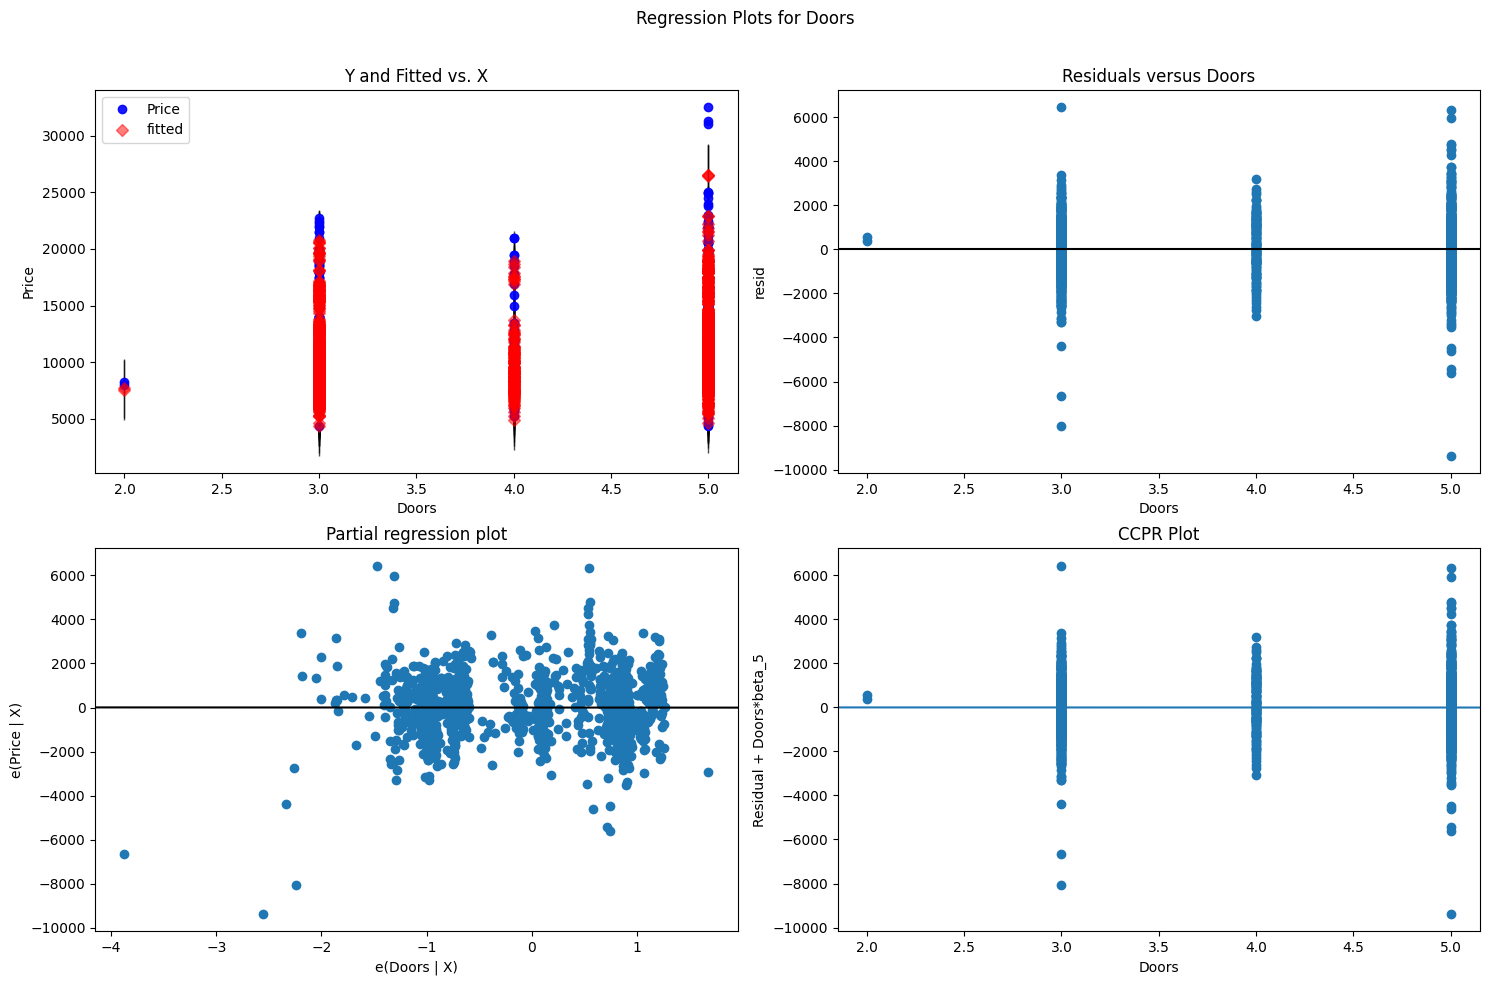

In [73]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model, 'Doors', fig=fig)

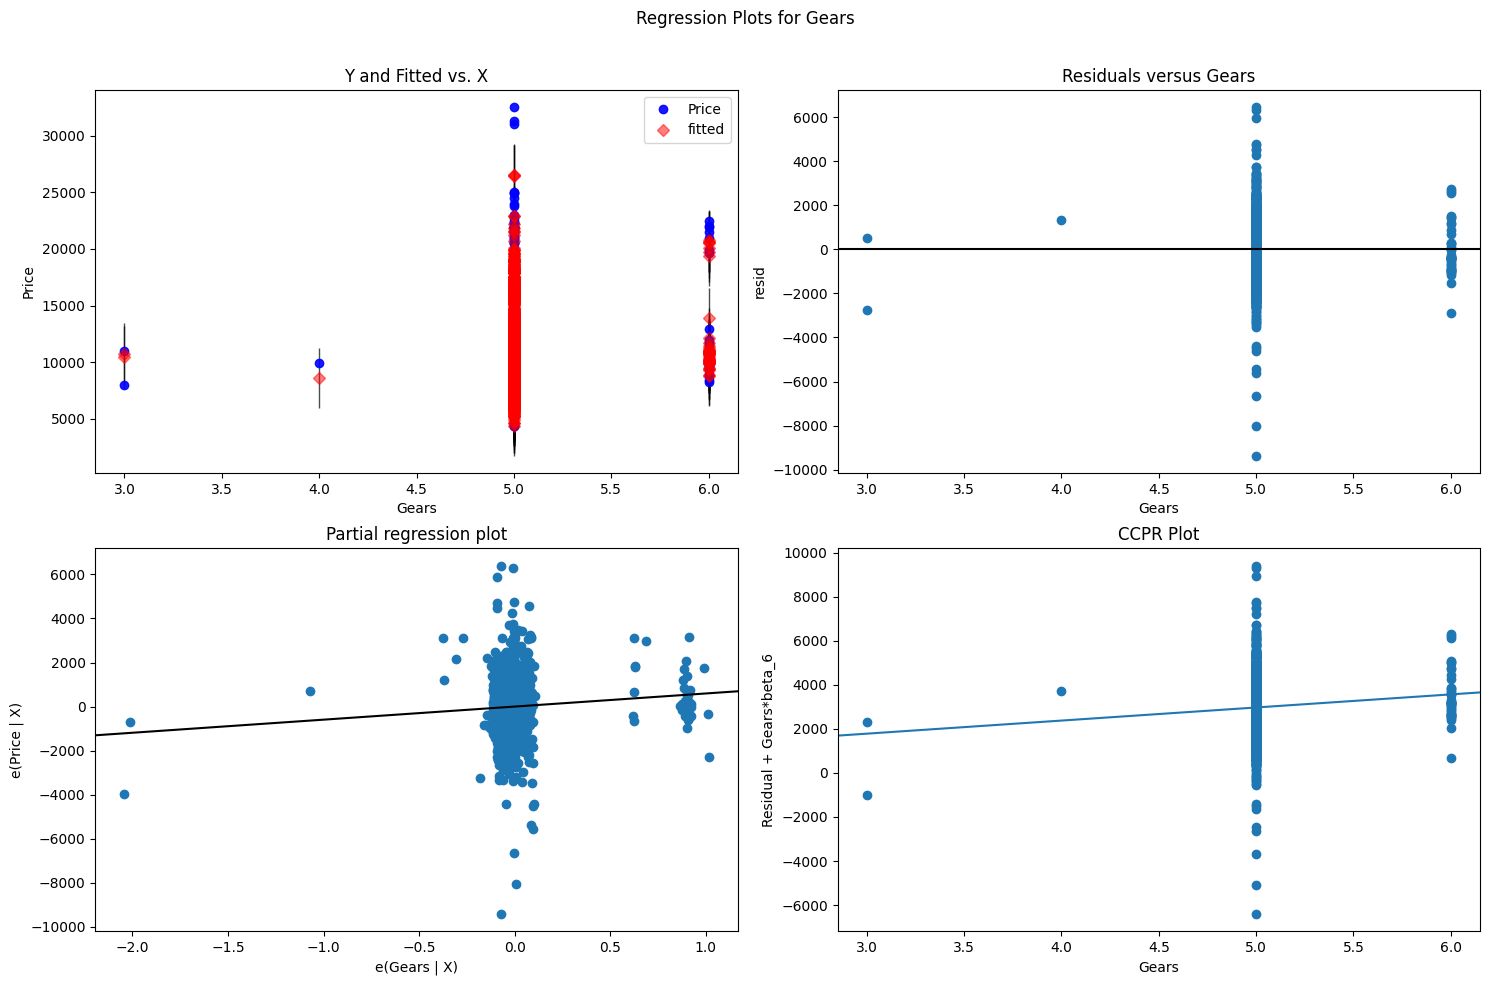

In [74]:
fig= plt.figure(figsize=(15,10))
fig= sm.graphics.plot_regress_exog(model, 'Gears', fig=fig)

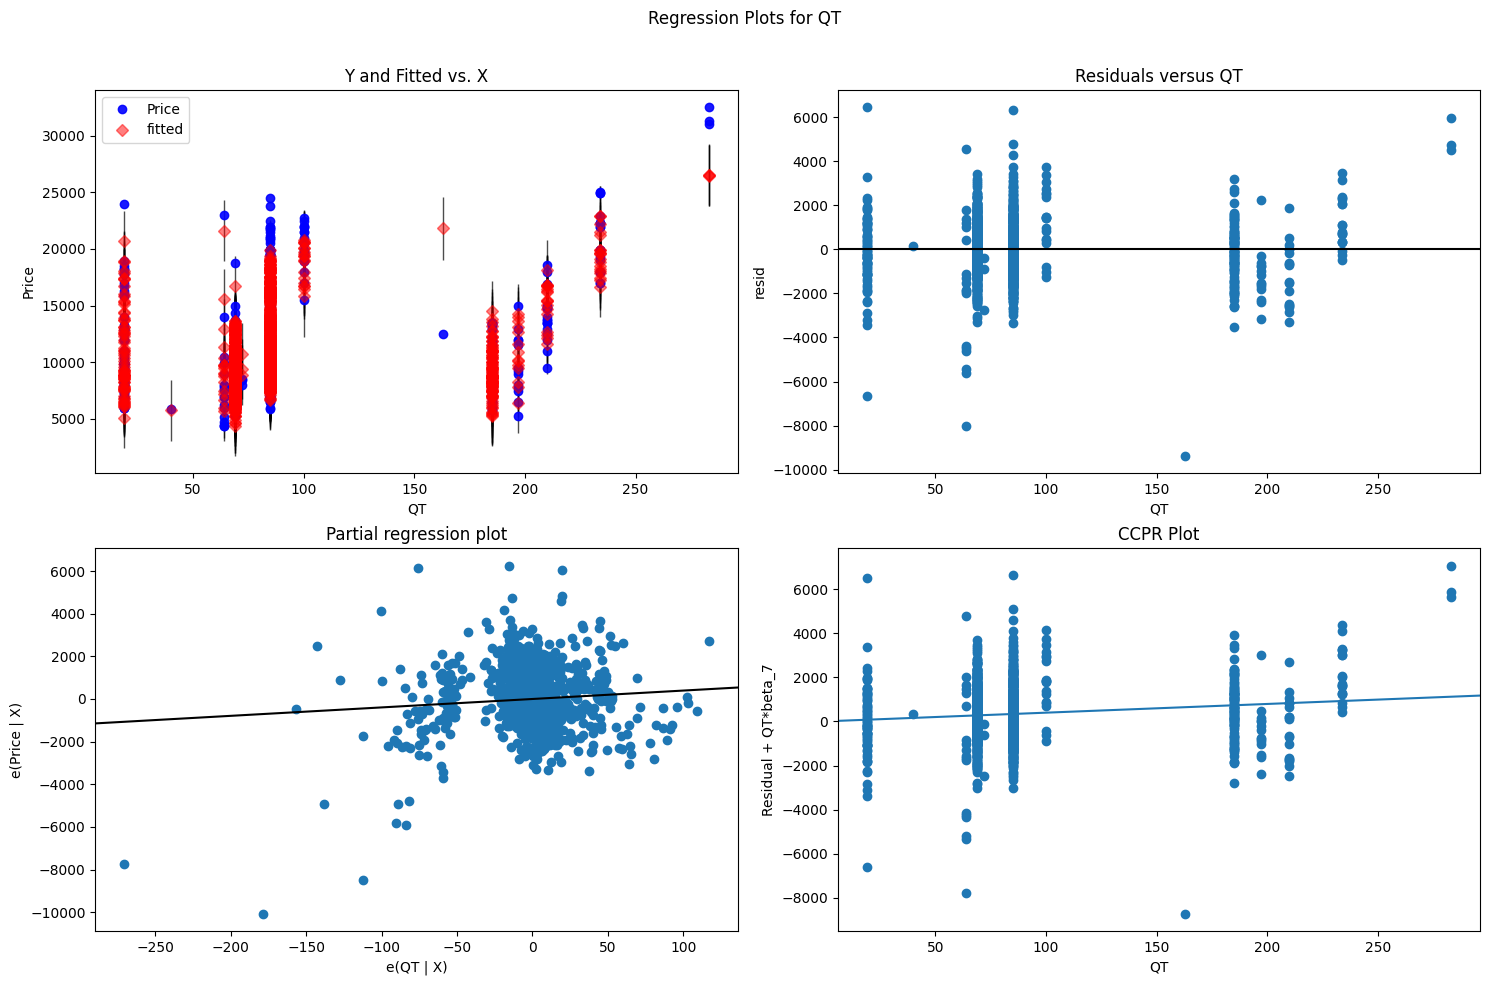

In [75]:
fig= plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'QT', fig=fig)

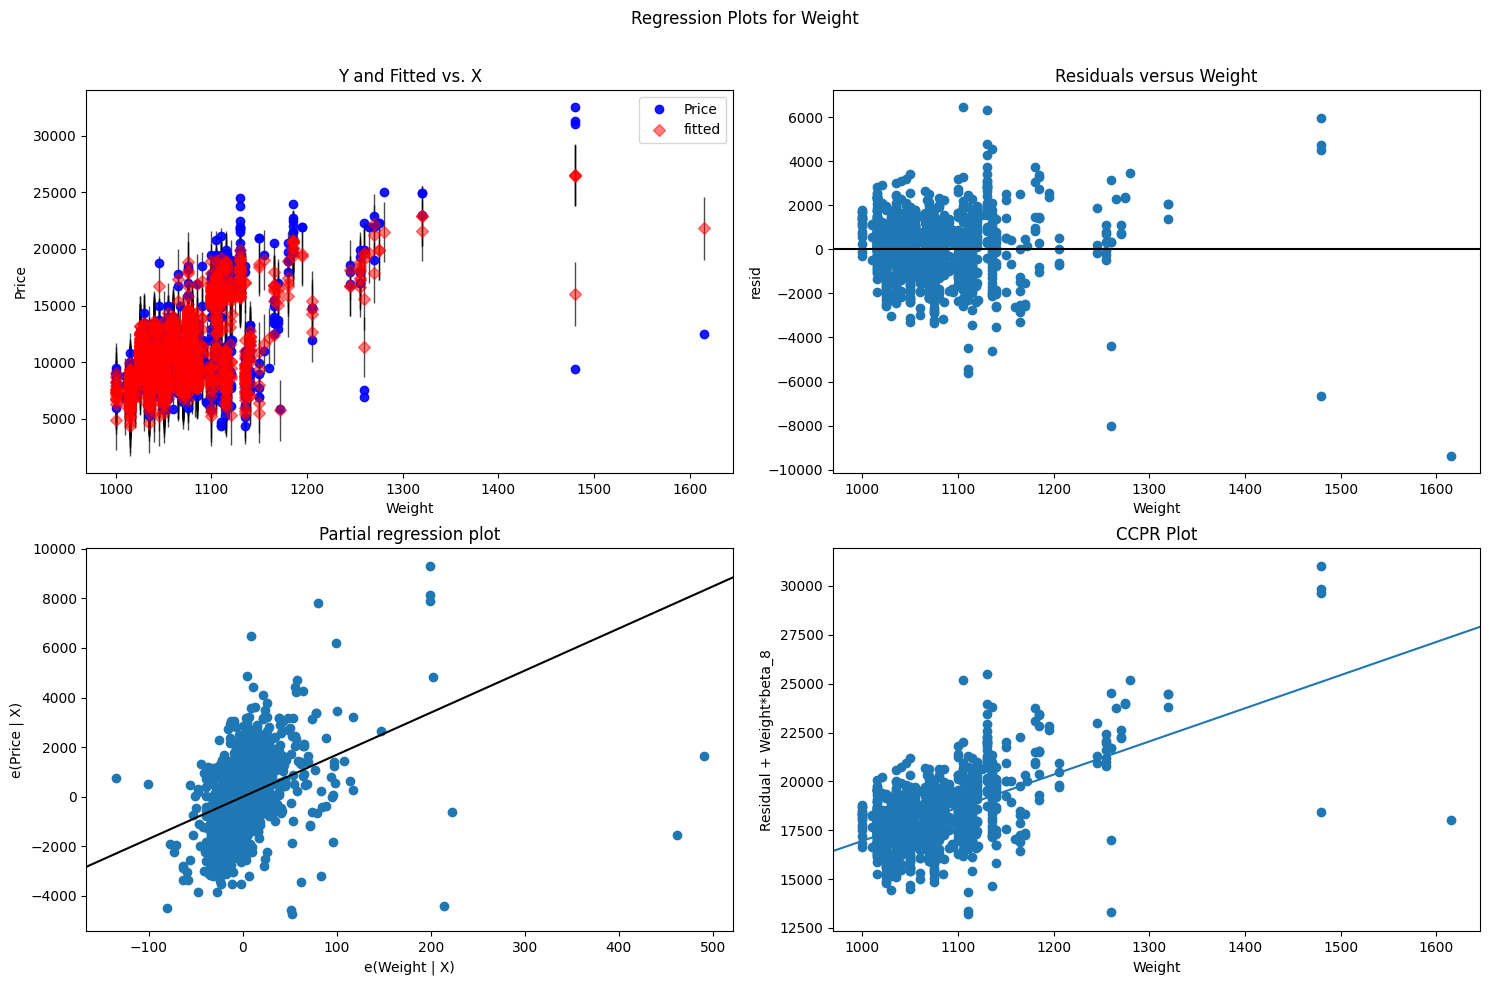

In [76]:
fig= plt.figure(figsize=(15,10))
fig = sm.graphics.plot_regress_exog(model, 'Weight', fig=fig)

In [77]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(values) : return (values-values.mean())/values.std()  # User defined z = (x - mu)/sigma

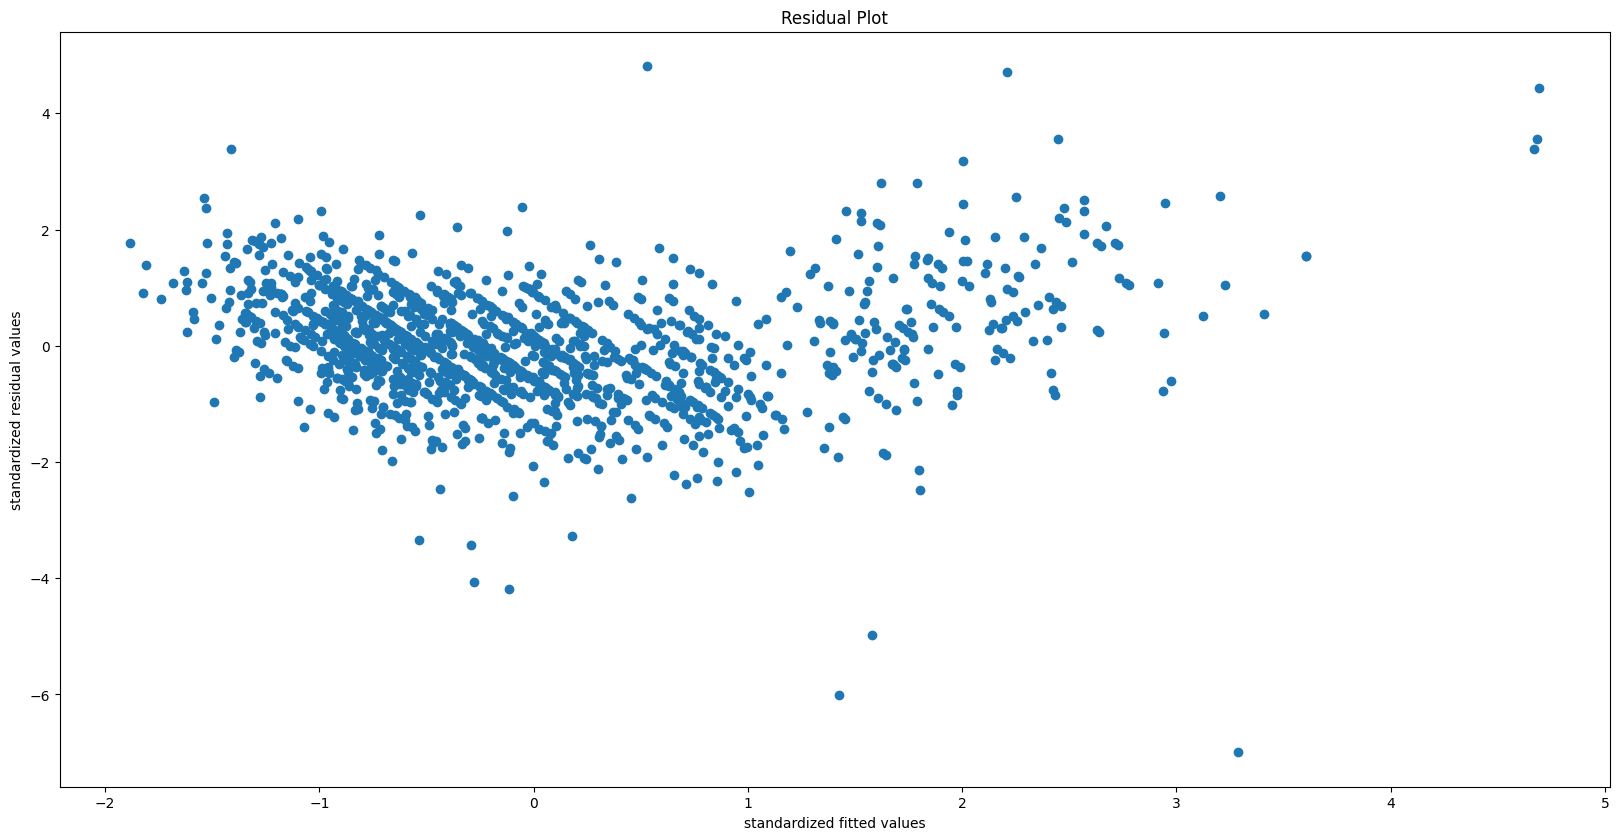

In [78]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

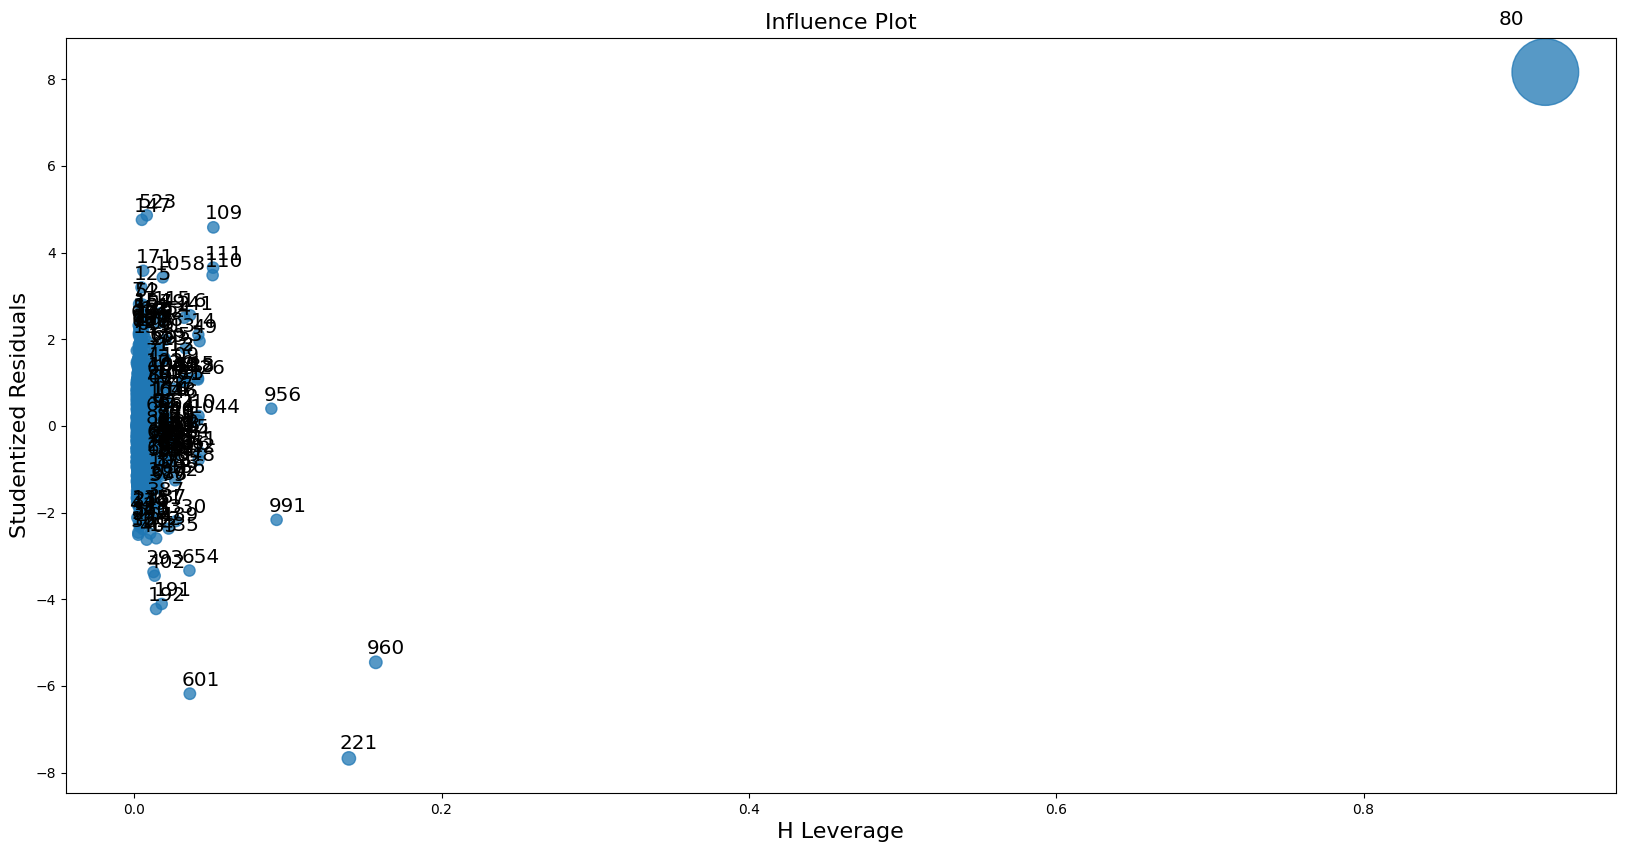

In [79]:
sm.graphics.influence_plot(model)
plt.show()

**Detecting Influencers / Outliers**

In [80]:
(c, _) = model.get_influence().cooks_distance
c

array([7.23682667e-03, 3.96793393e-03, 5.46476784e-03, ...,
       8.44762355e-07, 6.97878368e-04, 1.08627724e-02])

Text(0, 0.5, 'Cooks Distance')

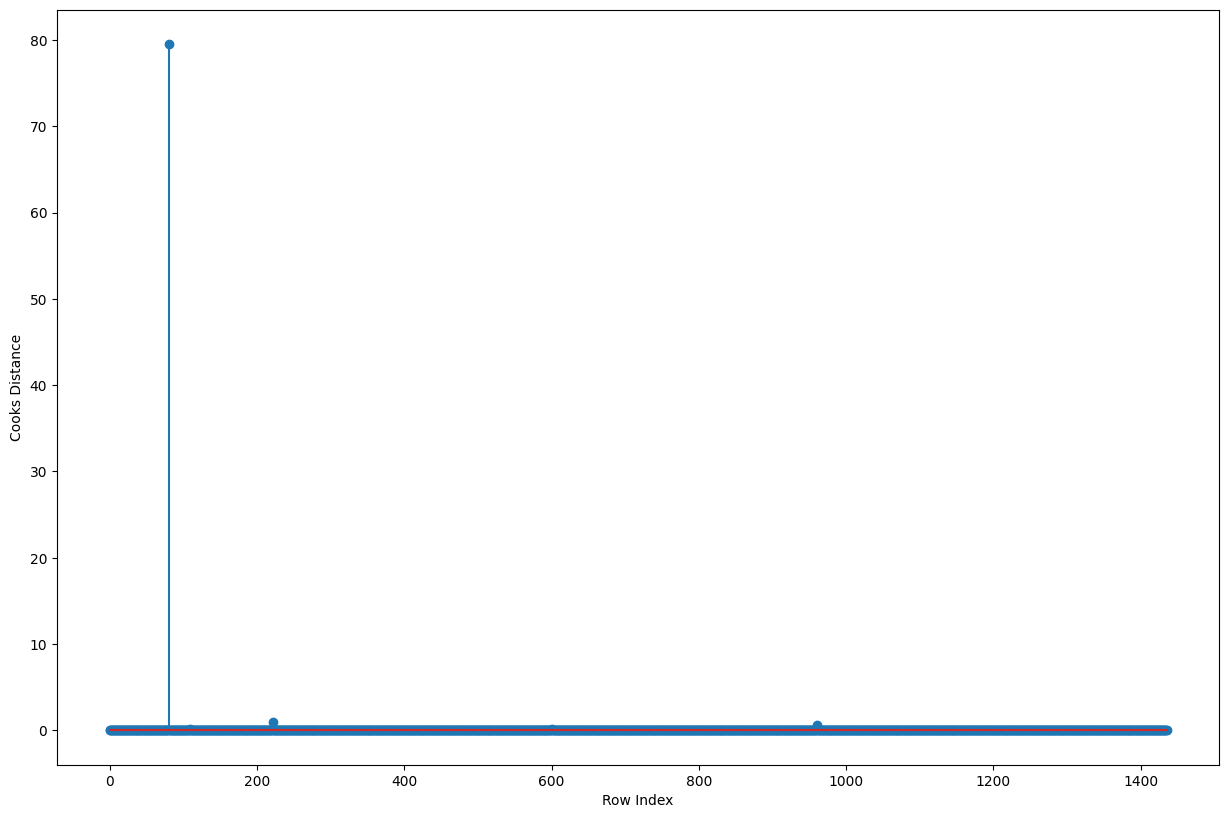

In [81]:
# Plot the influencers using the stem plot
fig = plt.figure(figsize=(15, 10))
plt.stem(np.arange(len(df)), np.round(c, 5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')

In [82]:
# Index and value of influencer
np.argmax(c) , np.max(c)

(80, 79.52010624141955)

In [83]:
df.drop(index=80, axis=0, inplace=True)

In [84]:
len(df)

1435

In [85]:
final_model = smf.ols('Price~ Age+ KM+ HP+ cc+ Doors+ Gears+ QT+ Weight',data=df).fit() 

In [86]:
final_model.tvalues, final_model.pvalues

(Intercept    -4.545107
 Age         -47.021323
 KM          -13.972555
 HP           13.515507
 cc           -8.215903
 Doors        -0.693871
 Gears         2.716621
 QT            6.347531
 Weight       18.075652
 dtype: float64, Intercept     5.954986e-06
 Age          3.232372e-292
 KM            1.121552e-41
 HP            2.960385e-39
 cc            4.674360e-16
 Doors         4.878758e-01
 Gears         6.674954e-03
 QT            2.933269e-10
 Weight        6.409190e-66
 dtype: float64)

In [87]:
final_model.rsquared, final_model.rsquared_adj

(0.8693790488655819, 0.8686462525057815)

Final_Model accuracy is 86.87%

**Model_Prediction**

In [88]:
df.head(3)

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165


In [89]:
new_data = pd.DataFrame({
    "Age":[23,24,29,38],
    'KM':[84325,54683,94267,47936],
    'HP':[90,86,100,70],
    'cc':[2000,1975,1964,2134],
    'Doors':[2,4,3,2],
    'Gears':[5,6,7,9],
    'QT':[234,213,197,210],
    'Weight':[1167,1134,1754,1123]
})
new_data

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,23,84325,90,2000,2,5,234,1167
1,24,54683,86,1975,4,6,213,1134
2,29,94267,100,1964,3,7,197,1754
3,38,47936,70,2134,2,9,210,1123


In [90]:
final_model.predict(new_data)

0    16147.159580
1    16075.590550
2    28254.464728
3    14856.088586
dtype: float64